<a href="https://colab.research.google.com/github/tikendraw/Project1_Movie_genre_from_Poster_Multilabel_Classification/blob/main/Movie_Genre_from_its_Poster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Genre from its Poster

##About Dataset
**Context**

For movie viewers, the movie posters are one of the first impressions which humans use to get cues
about the movie content and its genre. Humans can grasp the cues like color, expressions on the faces of actors etc to quickly determine the genre (horror, comedy, animation etc). It has been shown that color characteristics of an image like hues, saturation, brightness, contour etc. affect human emotions. A given situation arouses these emotions in humans. If humans are able to predict genre of a movie by a single glance at its poster, then we can assume that the color characteristics, local texture based features and structural cues of posters possess some characteristics which could be utilized in machine learning algorithms to predict its genre.

**Movie Poster Dataset Content**

This dataset was collected from the IMDB website. One poster image was collected from one (mostly) Hollywood movie released from 1980 to 2015. Each poster image is associated with a movie as well as some metadata like ID, genres, and box office. The ID of each image is set as its file name.

[More Info here](http://mmcv.csie.ncku.edu.tw/~wtchu/projects/MoviePoster/index.html)

[Get the Dataset](http://mmcv.csie.ncku.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Dataset.zip) or [Download from kaggle (suggested)](https://www.kaggle.com/datasets/dadajonjurakuziev/movieposter)

[Get the Dataset Metadata](http://mmcv.csie.ncku.edu.tw/~wtchu/projects/MoviePoster/Movie_Poster_Metadata.zip)

In [16]:
import os
from zipfile import ZipFile

# 1. Get the DATA

In [ ]:
# os.chdir('/root')
# os.listdir('/root/')
# !mkdir /root/.kaggle

In [2]:
!git clone https://github.com/tikendraw/funcyou.git
from funcyou.dataset import download_kaggle_dataset

Cloning into 'funcyou'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 198 (delta 20), reused 0 (delta 0), pack-reused 156
Receiving objects: 100% (198/198), 58.80 KiB | 7.35 MiB/s, done.
Resolving deltas: 100% (101/101), done.


In [13]:
!pip install kaggle -q
!pip install wget -q

  Preparing metadata (setup.py) ... done


In [11]:
#download the data
data_url = 'dadajonjurakuziev/movieposter'
data_urlf = "https://www.kaggle.com/datasets/dadajonjurakuziev/movieposter"



! kaggle datasets download -d dadajonjurakuziev/movieposter

 99% 828M/838M [00:07<00:00, 62.5MB/s]
100% 838M/838M [00:07<00:00, 112MB/s] 


In [18]:
#extract moviep
zipf = ZipFile('./movieposter.zip',)
zipf.extractall()
zipf.close()

In [19]:
from funcyou.utils import dir_walkthrough

In [20]:
path = '/content/img_41K'
dir_walkthrough(path)

,Directory,Folders,Images,Videos,Others,Total Files
0,/content/img_41K,1,0,0,0,0
1,/content/img_41K/img_41K,0,83958,0,0,83958


In [21]:
# read the csv
import pandas as pd

df = pd.read_csv('duplicate_free_41K.csv')
df.sample(5)

,id,poster,title,year,rating,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller
38387,38428,https://m.media-amazon.com/images/M/MV5BYjExNz...,Up! Up! To the Sky,2008,6.2,"comedy, drama, romance",0,0,0,1,0,1,0,0,0,1,0,0,0
29441,29468,https://m.media-amazon.com/images/M/MV5BZjM4Nz...,The Sleepover,2012,6.8,"short, comedy, horror",0,0,0,1,0,0,0,1,0,0,0,1,0
9740,9748,https://m.media-amazon.com/images/M/MV5BNTNkZW...,Betrayed,2018,5.3,"action, crime, thriller",1,0,0,0,1,0,0,0,0,0,0,0,1
10293,10302,https://m.media-amazon.com/images/M/MV5BNzMwZD...,Gags The Clown,2018,4.5,"comedy, horror",0,0,0,1,0,0,0,1,0,0,0,0,0
30187,30215,https://m.media-amazon.com/images/M/MV5BYzEzZT...,Sudigaadu,2012,5.7,"action, comedy",1,0,0,1,0,0,0,0,0,0,0,0,0


# Preprocessing the csv

If we just have to predict using the posters we do not need some of these columns:
* columns to drop = poster, title, year, rating
* create a column file full image path

In [22]:
df.drop(['poster','title','year','rating'], axis = 1, inplace = True)

In [23]:
df['image_path'] = df['id'].apply(lambda x: 'img_41K/img_41K/'+str(x)+'.jpg')

In [24]:
df.head()

,id,genre,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller,image_path
0,0,"comedy, romance",0,0,0,1,0,0,0,0,0,1,0,0,0,img_41K/img_41K/0.jpg
1,1,horror,0,0,0,0,0,0,0,1,0,0,0,0,0,img_41K/img_41K/1.jpg
2,2,"short, fantasy, horror",0,0,0,0,0,0,1,1,0,0,0,1,0,img_41K/img_41K/2.jpg
3,3,"short, action, comedy",1,0,0,1,0,0,0,0,0,0,0,1,0,img_41K/img_41K/3.jpg
4,4,drama,0,0,0,0,0,1,0,0,0,0,0,0,0,img_41K/img_41K/4.jpg


Text(0.5, 1.0, 'comedy, drama, romance')

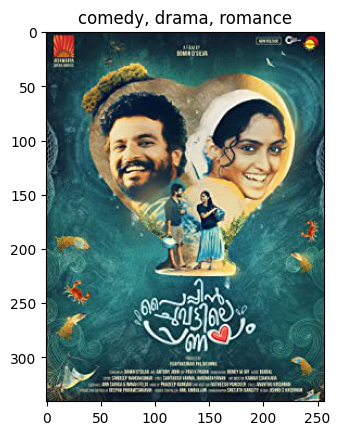

In [25]:
# let's see a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

num = random.randint(0, df.shape[0])
img = mpimg.imread(df['image_path'][num])
plt.imshow(img)
plt.title(df['genre'][num])

# creating the DATASET

In [26]:
clean_df = df.drop(['id','genre'], axis = 1)

In [27]:
clean_df

,action,adventure,animation,comedy,crime,drama,fantasy,horror,mystery,romance,sci-fi,short,thriller,image_path
0,0,0,0,1,0,0,0,0,0,1,0,0,0,img_41K/img_41K/0.jpg
1,0,0,0,0,0,0,0,1,0,0,0,0,0,img_41K/img_41K/1.jpg
2,0,0,0,0,0,0,1,1,0,0,0,1,0,img_41K/img_41K/2.jpg
3,1,0,0,1,0,0,0,0,0,0,0,1,0,img_41K/img_41K/3.jpg
4,0,0,0,0,0,1,0,0,0,0,0,0,0,img_41K/img_41K/4.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41974,1,1,0,0,0,1,0,0,0,0,0,0,0,img_41K/img_41K/42016.jpg
41975,1,1,0,1,0,0,0,0,0,0,0,0,0,img_41K/img_41K/42017.jpg
41976,0,0,0,1,0,1,0,0,0,0,0,0,0,img_41K/img_41K/42018.jpg
41977,0,0,0,0,0,0,0,1,0,0,0,0,1,img_41K/img_41K/42019.jpg


In [28]:
# split the dATASET
from sklearn.model_selection import train_test_split

rest, test = train_test_split(clean_df, test_size = .1, random_state = 4)
train, val = train_test_split(rest, test_size = .1, random_state = 4)
print('trainning data', train.shape,'val data', val.shape, 'test data', test.shape)


trainning data (34002, 14) val data (3779, 14) test data (4198, 14)


TEST

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#**Note:** For Multi lable classification set **class_mode= 'raw'**
There are other ways too.

In [34]:
labels = ['action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'fantasy', 'horror', 'mystery', 'romance', 'sci-fi', 'short',
       'thriller']

BATCH_SIZE = 8
IMAGE_SIZE = (256,256)

# creating Image generatory for training /testing and validation
train_gen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True)
test_gen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True)
val_gen = ImageDataGenerator(rescale = 1./255,horizontal_flip = True)

# Flowing with the Flow
train_data = train_gen.flow_from_dataframe( train, 
                                           x_col = 'image_path', 
                                           y_col = labels, 
                                           target_size = IMAGE_SIZE, 
                                           class_mode = 'raw', 
                                           batch_size=BATCH_SIZE)

test_data = test_gen.flow_from_dataframe( test, 
                                         x_col = 'image_path', 
                                         y_col = labels, 
                                         target_size = IMAGE_SIZE, 
                                         class_mode = 'raw', 
                                         shuffle = False, 
                                         batch_size=BATCH_SIZE)

val_data = val_gen.flow_from_dataframe( val, 
                                       x_col = 'image_path', 
                                       y_col = labels, 
                                       target_size = IMAGE_SIZE, 
                                       class_mode = 'raw', 
                                       shuffle = False, 
                                       batch_size=BATCH_SIZE)

Found 34002 validated image filenames.
Found 4198 validated image filenames.
Found 3779 validated image filenames.


8
8


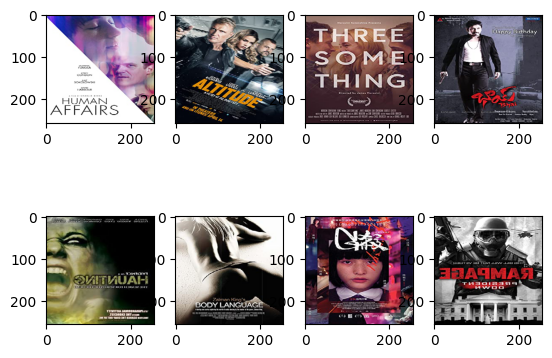

In [50]:
# Visualizing the Train data generator
import matplotlib.pyplot as plt

for i in train_data.next():
    plot_n = 1

    print(len(i))
    
    for image in i:
        if image.ndim == 3:
            plt.subplot(2,4,plot_n)
            plt.imshow((image*255).astype('int32'))
            plot_n += 1


# A Basic CNN fucntional Model

In [44]:
#model
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, Dropout

In [33]:
input1 = keras.layers.Input(shape = IMAGE_SIZE+(3,))

# layer1
x = Conv2D(30,3,2,activation= 'relu') (input1)
x = BatchNormalization()(x)
#layer2
x = Conv2D(30,3,activation= 'relu') (x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Dropout(.2)(x)
#layer3
x = Conv2D(20,3,activation= 'relu') (x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
x = Dropout(.2)(x)
#layer4
x = Conv2D(15,3,activation= 'relu') (x)
x = BatchNormalization()(x)
x = MaxPool2D()(x)
#layer5
x = Conv2D(10,3,activation= 'relu') (x)
x = Flatten()(x)
#layer Dense(s)
x = Dense(units = 50, activation = 'relu')(x)
x = Dense(units = 30, activation = 'relu')(x)
x = Dense(units = 20, activation = 'relu')(x)

output1 = Dense(units = 13, activation = 'sigmoid')(x)

model = keras.Model(inputs = input1, outputs = output1)

model.compile(loss = 'binary_crossentropy',
              optimizer = keras.optimizers.Adam(.01),
              metrics = ['accuracy'])

In [ ]:
epochs = 10

STEPS_PER_EPOCH = train_data.n//train_data.batch_size
VALIDATION_STEPS = val_data.n//val_data.batch_size



In [ ]:
history0 = model.fit(train_data, 
                 epochs=epochs, 
                 steps_per_epoch = STEPS_PER_EPOCH,
                 validation_data = val_data,
                 validation_steps = VALIDATION_STEPS)

Epoch 1/10
531/531 [==============================] - 160s 269ms/step - loss: 0.4311 - accuracy: 0.2346 - val_loss: 0.4308 - val_accuracy: 0.2500
Epoch 2/10
531/531 [==============================] - 141s 265ms/step - loss: 0.4207 - accuracy: 0.2477 - val_loss: 0.4250 - val_accuracy: 0.2654
Epoch 3/10
531/531 [==============================] - 141s 265ms/step - loss: 0.4169 - accuracy: 0.2487 - val_loss: 0.4166 - val_accuracy: 0.2664
Epoch 4/10
531/531 [==============================] - 140s 263ms/step - loss: 0.4119 - accuracy: 0.2540 - val_loss: 0.4122 - val_accuracy: 0.2699
Epoch 5/10
531/531 [==============================] - 140s 263ms/step - loss: 0.4087 - accuracy: 0.2654 - val_loss: 0.4233 - val_accuracy: 0.2572
Epoch 6/10
531/531 [==============================] - 140s 264ms/step - loss: 0.4064 - accuracy: 0.2721 - val_loss: 0.4157 - val_accuracy: 0.2961
Epoch 7/10
531/531 [==============================] - 139s 261ms/step - loss: 0.4040 - accuracy: 0.2907 - val_loss: 0.4098 -

In [ ]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

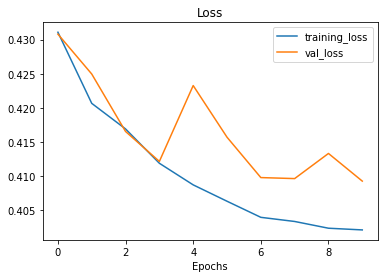

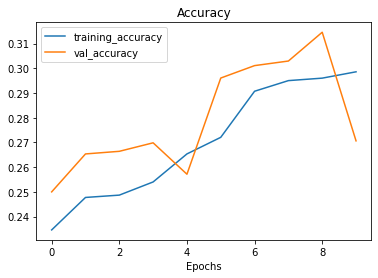

In [ ]:
plot_loss_curves(history0)

In [ ]:
model.save('/gdrive/MyDrive/model/poster_model/model0.h5')

# A Transfer Learning Model

We are using Transfer Learning model because they are excellent at learning features and are made with extensive research

In [ ]:
def create_model( model_url, class_number, trainable = False):
    '''
    Take a Model url and Class number and return a Model

    Args:
        Model_url = a tensorflow hub model url
        class_number : number of the output class
    
    Returns:
        An uncompiled model from url

    '''
    import tensorflow_hub as hub
    feature_extraction_layer = hub.KerasLayer( model_url ,
                                              trainable = trainable,
                                              name = 'feature_extraction_layer',
                                              input_shape = IMAGE_SIZE +(3,))
    
    model = keras.Sequential([
                              feature_extraction_layer,
                              keras.layers.Dense( class_number, activation= 'softmax', name = 'output_layer')
    ])
    return model

In [ ]:
effiecientnet_url = "https://tfhub.dev/google/efficientnet/b7/classification/1"


In [ ]:
effinet = create_model(model_url = effiecientnet_url, class_number = 13)

In [ ]:
effinet.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

In [ ]:
history1 = effinet.fit(train_data,
                epochs=epochs, 
                 steps_per_epoch = STEPS_PER_EPOCH,
                 validation_data = val_data,
                 validation_steps = VALIDATION_STEPS,
                 batch_size = BATCH_SIZE)

Epoch 1/10
531/531 [==============================] - 550s 992ms/step - loss: 0.4005 - accuracy: 0.3447 - val_loss: 0.3790 - val_accuracy: 0.3753
Epoch 2/10
531/531 [==============================] - 524s 987ms/step - loss: 0.3725 - accuracy: 0.3753 - val_loss: 0.3763 - val_accuracy: 0.3729
Epoch 3/10
531/531 [==============================] - 524s 986ms/step - loss: 0.3690 - accuracy: 0.3803 - val_loss: 0.3726 - val_accuracy: 0.3991
Epoch 4/10
531/531 [==============================] - 524s 986ms/step - loss: 0.3674 - accuracy: 0.3799 - val_loss: 0.3707 - val_accuracy: 0.3962
Epoch 5/10
531/531 [==============================] - 524s 986ms/step - loss: 0.3661 - accuracy: 0.3798 - val_loss: 0.3676 - val_accuracy: 0.3935
Epoch 6/10
531/531 [==============================] - 524s 986ms/step - loss: 0.3649 - accuracy: 0.3814 - val_loss: 0.3693 - val_accuracy: 0.3972
Epoch 7/10
531/531 [==============================] - 525s 989ms/step - loss: 0.3640 - accuracy: 0.3839 - val_loss: 0.3693 -

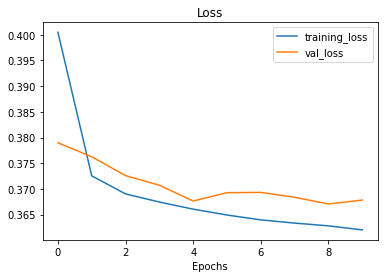

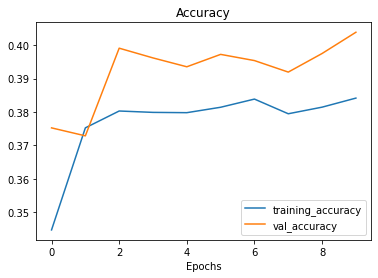

In [ ]:
plot_loss_curves(history1)

In [ ]:
model.save('/gdrive/MyDrive/model/poster_model/Effinet_transfer_model.h5')

In [ ]:
import numpy as np


In [ ]:
result = model.evaluate(test_data)
result

66/66 [==============================] - 15s 226ms/step - loss: 0.4075 - accuracy: 0.2789


[0.40749797224998474, 0.278942346572876]

In [ ]:
effi_result = effinet.evaluate(test_data)
effi_result

66/66 [==============================] - 58s 876ms/step - loss: 0.3669 - accuracy: 0.3902


[0.36690130829811096, 0.39018580317497253]

##Prediction

Defining some Fuctions to predict and plot the Image with predicted Labels

In [ ]:
def show_result(result, n):
    sort_labels = sorted(labels)
    res = np.argsort(result)[::-1]
    top_n = res[:n]
    all_preds = []
    for i in top_n:
        all_preds.append(sort_labels[i])
    return all_preds

In [ ]:
def random_image_prediction(pred_row:int = 1,pred_col:int = 4,n:int = 3):
    test_batch = int(test_data.n/test_data.batch_size)

    total_plots = pred_row* pred_col
    plt.figure(figsize = (15,5))
    for i in range(total_plots):
        plt.subplot(pred_row, pred_col, i+1)
        
        num1 = random.randint(0,test_batch-1)
        num2 = random.randint(0,BATCH_SIZE-1)

        images, labs = test_data[num1]
        img = images[num2]
        lab = labs[num2]
        pred0 = model.predict(tf.expand_dims(img, axis = 0))
        effipred = effinet.predict(tf.expand_dims(img, axis = 0))

        plt.imshow(img)

        pred_labels = show_result(pred0.ravel(),n)
        effi_labels = show_result(effipred.ravel(),n)

        true_labels = show_result(lab, n)
        all_pred = f'''model0:{pred_labels},
        efficient_net:{effi_labels},
        true:{true_labels}'''
        
        
        plt.title(all_pred)
        plt.tight_layout()

    plt.show()

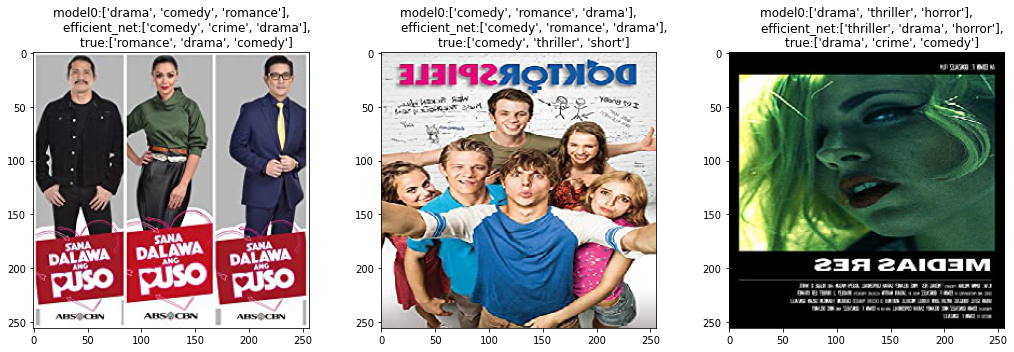

In [ ]:
random_image_prediction(pred_row = 1, pred_col = 3)

# Conclusion

Despite the Model accuracy of ~40% models predictions make sense and it categorises  movies as human who haven't seen the movie would do.



# It's A win ⭐